In [5]:
import numpy as np
from numpy import sin
from numpy import cos
import matplotlib.pyplot as plt

In [6]:
def betha(a, q):
  return np.sqrt(np.power(a,2)+np.power(q,2))

def phaseShiftFunc(a, q):
  b = betha(a, q)
  return np.arctan((a*sin(b)*cos(a)-b*sin(a)*cos(b))/(b*cos(b)*cos(a)+a*sin(b)*sin(a)))

def slicer(a):
  a_ = np.flip(a)
  res = np.array([a_[0]])
  an = 0
  for i, n in enumerate(a_[1:]):
    # if np.sign(a_[i])*np.sign(a_[i+1]) < 0:
    if a_[i] > 0 and a_[i+1] < 0:
      an += np.pi
      #print(an)
    res = np.append(res, [n+an])
  return np.flip(res)
  

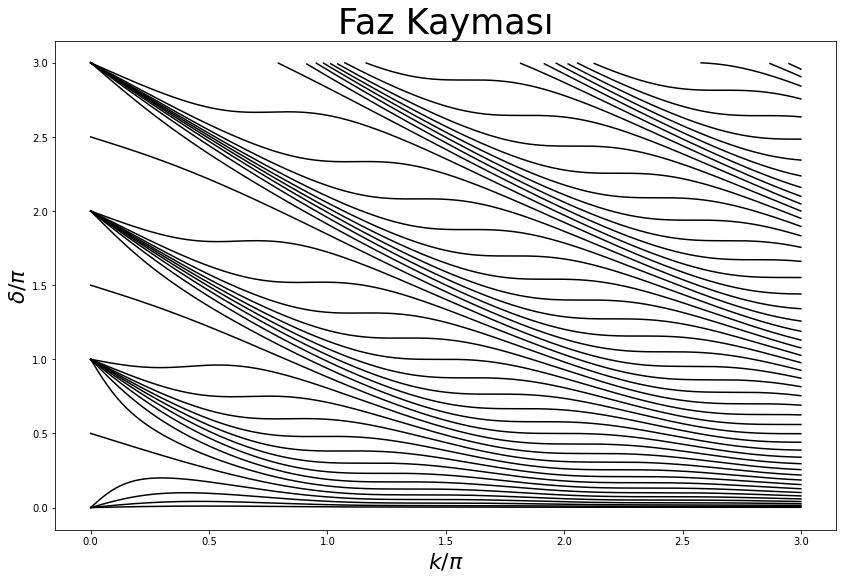

In [7]:
nn = 300
k = np.linspace(0.0001, 3*np.pi, nn)
dq = 0.1*np.pi
q = 0.1*np.pi

fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(14, 9)
ax.set_title("Faz Kayması", fontsize="35")
ax.set_xlabel("$k/\pi$", fontsize="22")
ax.set_ylabel("$\delta/\pi$", fontsize="22")

lst = -2
for i in range(51):
  phase = phaseShiftFunc(k, q)
  q = q + dq
  
  phase = slicer(phase)
  while phase[-1] < lst:
    phase += np.pi/2
  lst = phase[-1]

  phase = phase/np.pi
  phase = phase[phase < 3.0]

  ax.plot(k[-phase.size:]/np.pi, phase, 'k')

  
